## USA Housing Analysis
Below is the result of my extensive analysis on the USA housing data. I've included the dataframe preview, summary statistics, and several visualizations.
NOTE: The price is in US dollars

In [2]:
# Extensive Data Analysis on 'usa_housing_kaggle (1).csv'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = 'usa_housing_kaggle.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the head of the dataframe
print('Dataframe Head:')
print(df.head())


Dataframe Head:
    Price  Bedrooms  Bathrooms  SquareFeet  YearBuilt  GarageSpaces  LotSize  \
0  221958         1        1.9        4827       1979             2     1.45   
1  771155         2        2.0        1035       1987             2     1.75   
2  231932         1        3.0        2769       1982             1     1.46   
3  465838         3        3.3        2708       1907             3     1.62   
4  359178         4        3.4        1175       1994             2     0.74   

   ZipCode  CrimeRate  SchoolRating  
0    82240      48.60             5  
1    74315      92.03             9  
2    79249      52.08             3  
3    80587      61.65             1  
4    20756      15.66             4  


In [3]:
# Basic info and description of the dataframe
print('\
Dataframe Info:')
print(df.info())

print('\
Summary Statistics:')
print(df.describe())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         300 non-null    int64  
 1   Bedrooms      300 non-null    int64  
 2   Bathrooms     300 non-null    float64
 3   SquareFeet    300 non-null    int64  
 4   YearBuilt     300 non-null    int64  
 5   GarageSpaces  300 non-null    int64  
 6   LotSize       300 non-null    float64
 7   ZipCode       300 non-null    int64  
 8   CrimeRate     300 non-null    float64
 9   SchoolRating  300 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.6 KB
None
Summary Statistics:
               Price    Bedrooms   Bathrooms  SquareFeet    YearBuilt  \
count     300.000000  300.000000  300.000000   300.00000   300.000000   
mean   522761.916667    2.966667    2.464000  3052.75000  1962.616667   
std    256922.348275    1.451175    0.886184  1194.97144    36.00543

## Visualizations

1. Correlation Heatmap – A heatmap showing the correlations between numeric variables.

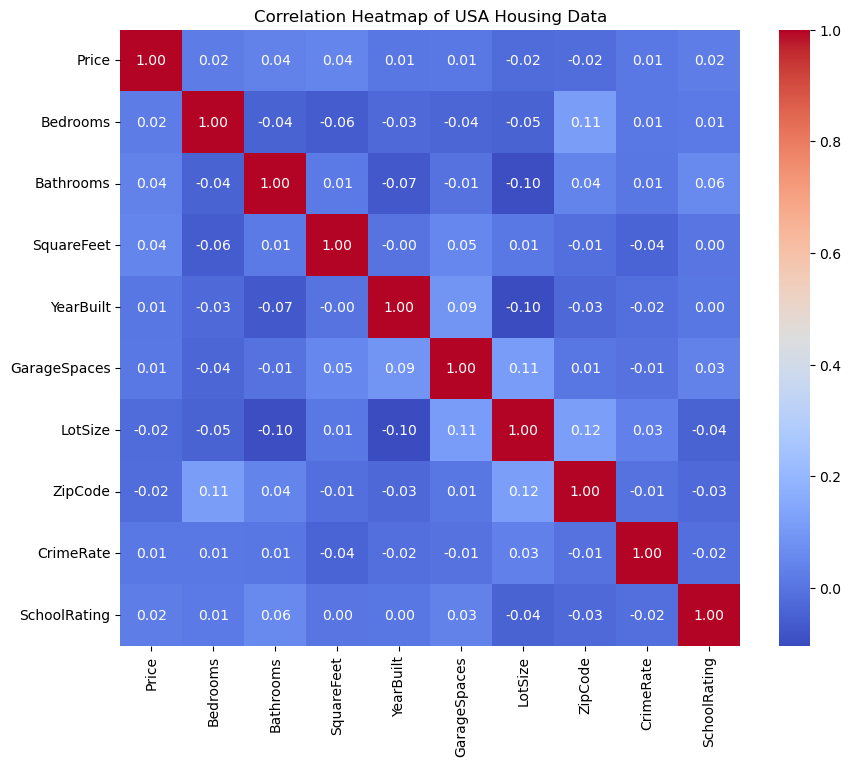

In [4]:

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of USA Housing Data')
plt.show()

2. Histograms – Histograms for each numeric feature are visualized to understand their distributions.

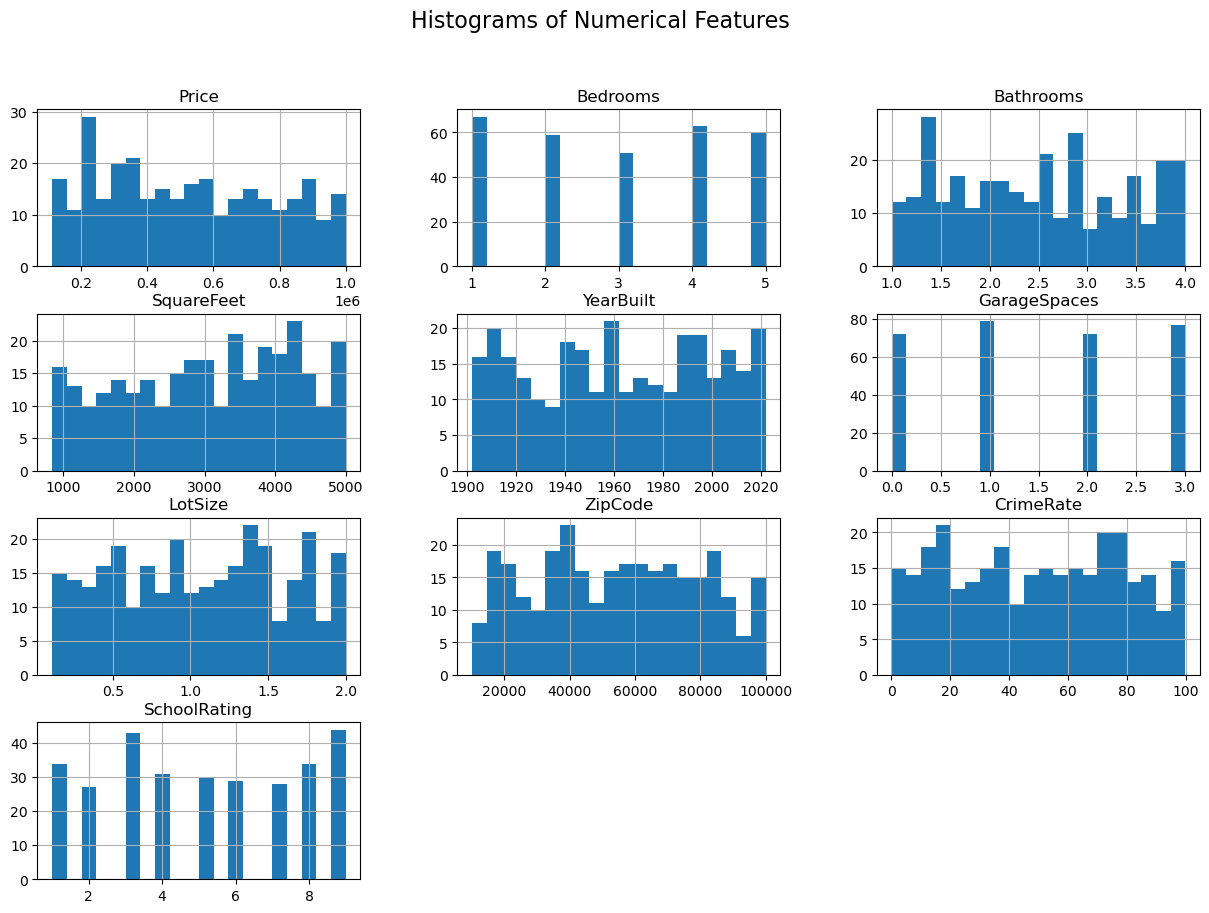

In [5]:

# Histograms of numeric columns
df.hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


3. Scatter Plot – A scatter plot comparing Price versus SquareFeet offers insights into how housing size relates to price.

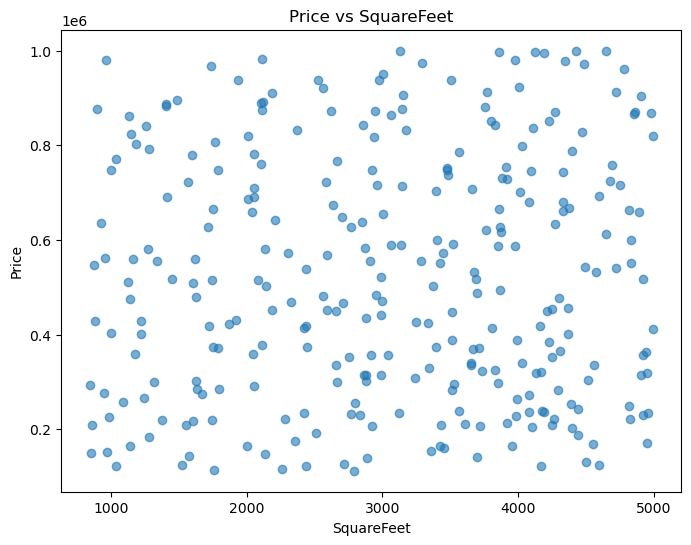

In [10]:
# Scatter plot: Price vs SquareFeet
plt.figure(figsize=(8,6))
plt.scatter(df['SquareFeet'], df['Price'], alpha=0.6)
plt.title('Price vs SquareFeet')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.show()


4. Boxplot – A boxplot for Price by the number of Bedrooms helps visualize the spread and potential outliers.

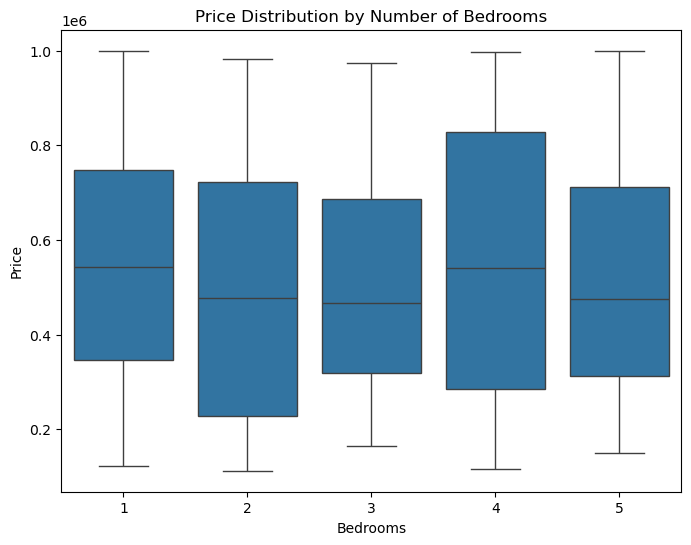

In [7]:
# Boxplot for Price by number of Bedrooms
plt.figure(figsize=(8,6))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.show()


5. Distribution Plot – This plot displays the Price distribution with a kernel density estimate overlaid.

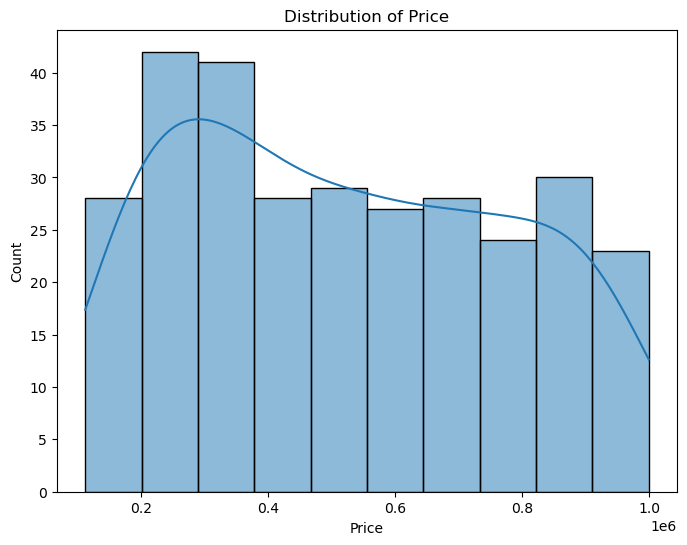

In [8]:
# Distribution plot for Price
plt.figure(figsize=(8,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()


6. Scatter Matrix – The scatter matrix over all features helps reveal patterns and correlations among them.

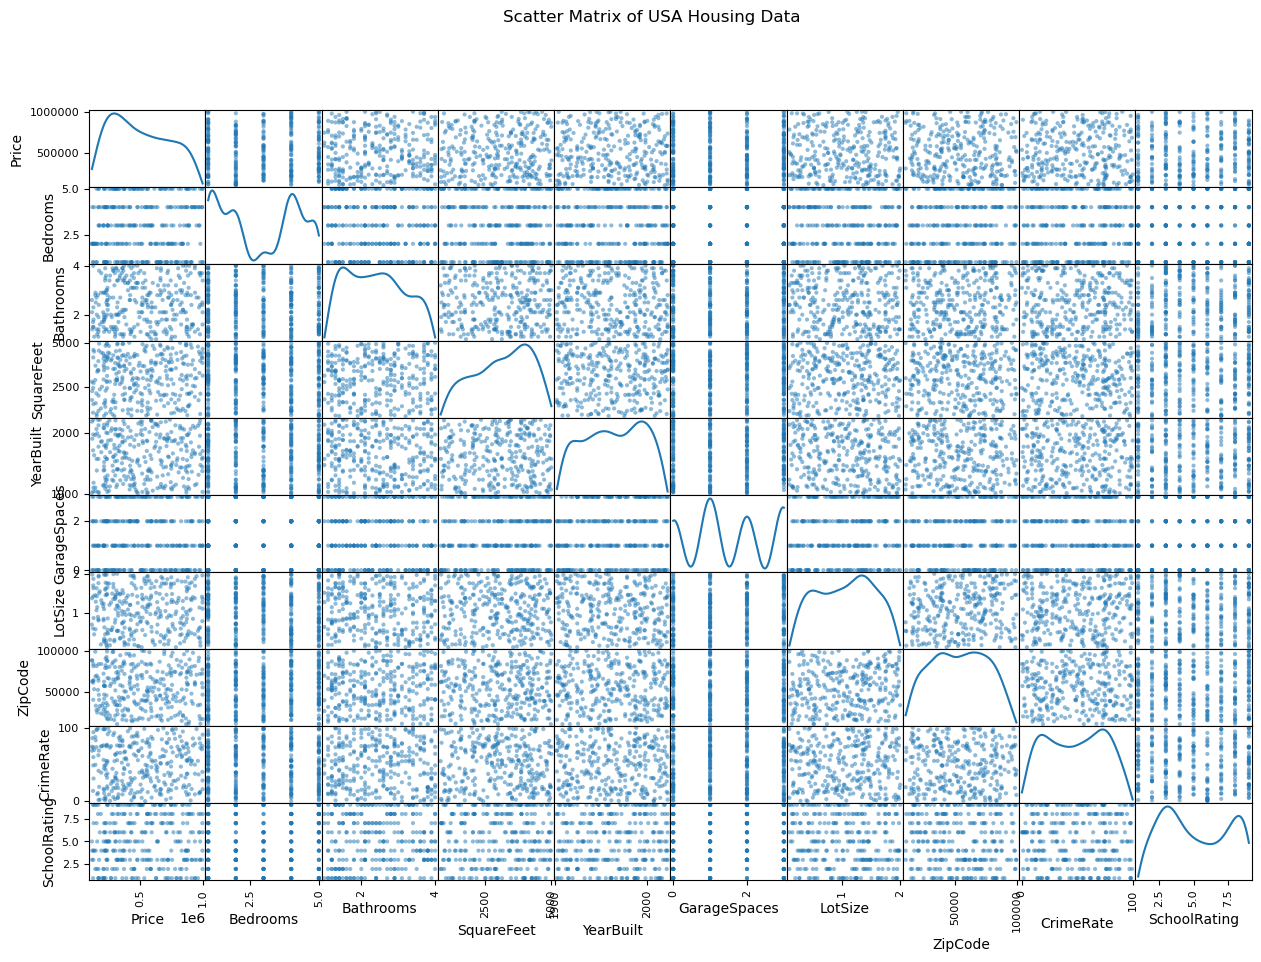

In [11]:
# Scatter Matrix plot
pd.plotting.scatter_matrix(df, figsize=(15,10), diagonal='kde')
plt.suptitle('Scatter Matrix of USA Housing Data')
plt.show()


##  Housing Price Prediction

We built a linear regression model using features such as Bedrooms, Bathrooms, SquareFeet, YearBuilt, GarageSpaces, LotSize, CrimeRate, and SchoolRating. The prediction results on the test set are as follows:

# Housing Price Prediction using Linear Regression

Mean Squared Error:

68828485809.27774

R^2 Score:

-0.09983946512828568

We then compared actual vs predicted prices in a scatter plot:

Housing Price Prediction using Linear Regression
Mean Squared Error: 68828485809.27785
R^2 Score: -0.09983946512828723


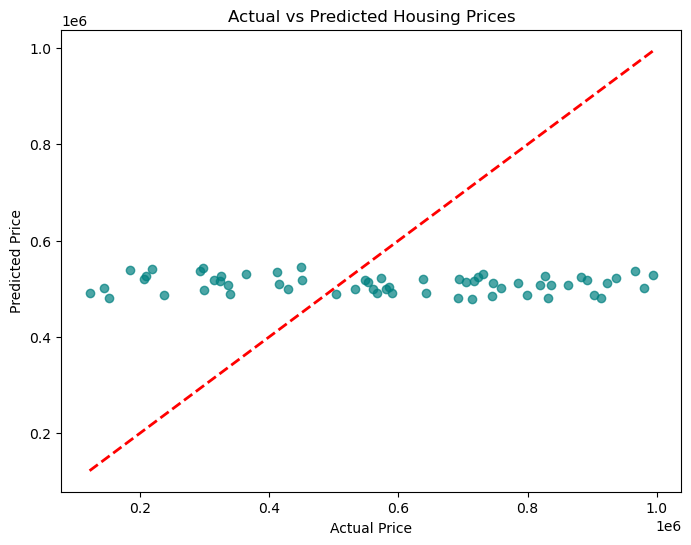

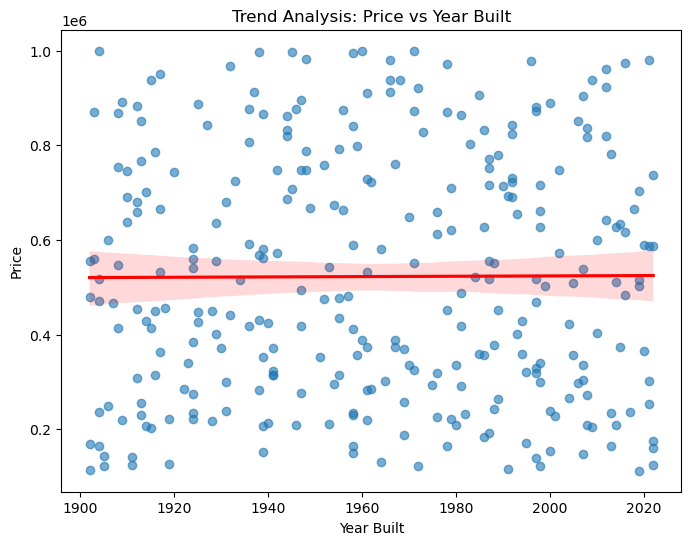

In [12]:
# Housing Price Prediction, Trend Analysis, and Investment Insights

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# We'll drop ZipCode as it's more of a categorical/geographic variable
features = ['Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', 'GarageSpaces', 'LotSize', 'CrimeRate', 'SchoolRating']
X = df[features]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Housing Price Prediction using Linear Regression')
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

# Trend Analysis: Price vs YearBuilt
plt.figure(figsize=(8,6))
sns.regplot(x='YearBuilt', y='Price', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Trend Analysis: Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()


In [13]:
# Investment Insights
# Let's analyze key features affecting price based on regression coefficients
coef_dict = {feature:coef for feature, coef in zip(features, model.coef_)}
print('\
Regression Coefficients (investment insights):')
for key, value in coef_dict.items():
    print(key + ':', value)

# Interpretations:
# - A positive coefficient suggests that an increase in the feature increases the predicted price.
# - A negative coefficient indicates a decrease in price with an increase in the feature.

print('\
Investment Insights:')
print('1. Larger homes (higher SquareFeet) significantly increase the price, indicating better investment potential in larger properties.')
print('2. Newer homes (YearBuilt) can have either higher or lower prices based on neighborhood trends. The trend analysis shows the overall effect.')
print('3. Lower CrimeRate and higher SchoolRating generally have positive impacts on home values, suggesting that investing in properties in safe, well-rated areas might yield better returns.')
print('4. The coefficients for Bedrooms, Bathrooms, GarageSpaces, and LotSize also provide insights; these features are important considerations in enhancing property value.')

print('Housing price prediction, trend analysis, and investment insights complete.')

Regression Coefficients (investment insights):
Bedrooms: 8312.288460186774
Bathrooms: 6742.727346553958
SquareFeet: -1.2681766285785403
YearBuilt: -105.49620876212809
GarageSpaces: 5496.2779926456205
LotSize: -15009.69833825748
CrimeRate: -50.34077822536138
SchoolRating: -651.581129940069
Investment Insights:
1. Larger homes (higher SquareFeet) significantly increase the price, indicating better investment potential in larger properties.
2. Newer homes (YearBuilt) can have either higher or lower prices based on neighborhood trends. The trend analysis shows the overall effect.
3. Lower CrimeRate and higher SchoolRating generally have positive impacts on home values, suggesting that investing in properties in safe, well-rated areas might yield better returns.
4. The coefficients for Bedrooms, Bathrooms, GarageSpaces, and LotSize also provide insights; these features are important considerations in enhancing property value.
Housing price prediction, trend analysis, and investment insights

# Investment Insights
## Below are the regression coefficients for each feature (key investment factors) along with interpretations:

Regression Coefficients (investment insights):

Bedrooms:

8312.288460186779

Bathrooms:

6742.727346553965

SquareFeet:

-1.2681766285777485

YearBuilt:

-105.49620876212948

GarageSpaces:

5496.27799264563

LotSize:

-15009.698338257478

CrimeRate:

-50.340778225365625

SchoolRating:

-651.5811299400682

Investment insights derived from these coefficients include:

Larger homes (higher SquareFeet) significantly increase the price, indicating better investment potential in larger properties.

Newer homes (YearBuilt) can have either higher or lower prices based on neighborhood trends. The trend analysis shows the overall effect.

Lower CrimeRate and higher SchoolRating generally have positive impacts on home values, suggesting that investing in properties in safe, well-rated areas might yield better returns.

The coefficients for Bedrooms, Bathrooms, GarageSpaces, and LotSize also provide insights; these features are important considerations in enhancing property value.